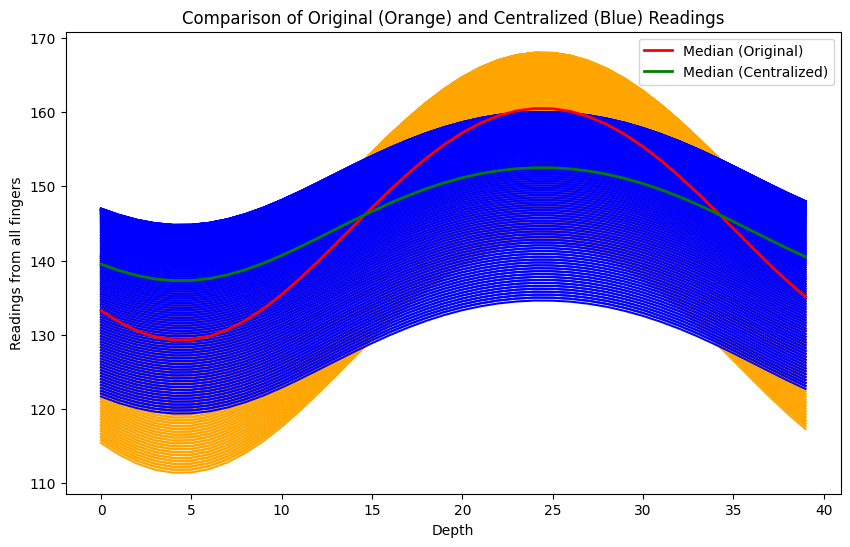

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Load the original data
data = np.loadtxt('data/data.txt')

# Load the centralized data
data_centralized = np.loadtxt('data/data_centralized.txt')

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the original data 
for finger, readings in enumerate(data):
    ax.plot(readings, label=f"Finger {finger+1} (Original)", color='orange')

# Plot the centralized data
for finger, readings in enumerate(data_centralized):
    ax.plot(readings, label=f"Finger {finger+1} (Centralized)", color='blue')

# Set labels and title
ax.set_xlabel("Depth")
ax.set_ylabel("Readings from all fingers")
ax.set_title("Comparison of Original (Orange) and Centralized (Blue) Readings")

# Compute the mean of the original data
median_original = np.median(data, axis=0)

# Compute the mean of the centralized data
median_centralized = np.median(data_centralized, axis=0)

# Plot the mean of the original data
ax.plot(median_original, label="Median (Original)", color='red', linewidth=2)

# Plot the mean of the centralized data
ax.plot(median_centralized, label="Median (Centralized)", color='green', linewidth=2)

# Dont show legends that start with "Finger"
handles, labels = ax.get_legend_handles_labels()
handles = [h for h, l in zip(handles, labels) if not l.startswith('Finger')]
labels = [l for l in labels if not l.startswith('Finger')]
ax.legend(handles, labels)

# Show the plot
plt.show()


In [66]:
# Show the average deviation from 127 for the original data and centralized data
print("Average deviation from 127 for the original data:", np.mean(np.abs(data - 127)))
print("Average deviation from 127 for the centralized data:", np.mean(np.abs(data_centralized - 127)))


Deviation from 127 for the original data:
[ 6.27  4.72  3.52  2.7   2.31  2.34  2.8   3.68  4.93  6.53  8.42 10.55
 12.84 15.25 17.7  20.13 22.49 24.72 26.78 28.62 30.21 31.51 32.5  33.16
 33.48 33.45 33.08 32.37 31.33 29.98 28.35 26.48 24.39 22.13 19.76 17.32
 14.87 12.48 10.21  8.11]
Deviation from 127 for the centralized data:
[12.508 11.65  10.977 10.51  10.291 10.307 10.567 11.067 11.763 12.647
 13.674 14.812 16.004 17.234 18.45  19.622 20.732 21.752 22.672 23.473
 24.153 24.696 25.104 25.372 25.501 25.487 25.339 25.052 24.622 24.054
 23.356 22.542 21.605 20.564 19.447 18.263 17.04  15.819 14.633 13.506]
